In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASE = "../app/data_pipeline"

features = pd.read_csv(f"{BASE}/features_train.csv")
print(features.shape)
features.head()

(266500, 42)


,target_date,warehouse_id,store_id,sku_id,region,actual_order_qty,lag_1,lag_2,lag_4,lag_8,...,back_to_school,avg_temp_c_ma4,cdd_ma4,hdd_ma4,precip_mm_ma4,himart_sales_index_ma4,holiday_index_ma4,marketing_score_ma4,y,split
0,2016-02-29,1,1,AC-CAR-16P-2024,본사창고,60,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,train
1,2016-03-07,1,1,AC-CAR-16P-2024,본사창고,0,60.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,2016-03-14,1,1,AC-CAR-16P-2024,본사창고,0,0.0,60.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,2016-03-21,1,1,AC-CAR-16P-2024,본사창고,0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,2016-03-28,1,1,AC-CAR-16P-2024,본사창고,0,0.0,0.0,60.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matyplotlib -rf

Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
Sudo媛� �씠 而댄벂�꽣�뿉�꽌 �궗�슜�븯吏� �븡�룄濡� �꽕�젙�릺�뼱 �엳�뒿�땲�떎. �궗�슜�븯�룄濡� �꽕�젙�븯�젮硫� �쑝濡� �씠�룞�븯�꽭�슂. ]8;;ms-settings:developers\Developer Settings page]8;;\ �꽕�젙 �빋�쓽
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [6]:
plt.rc('font', family='NanumBarunGothic')

# EDA
## 1. 타겟 분포 확인

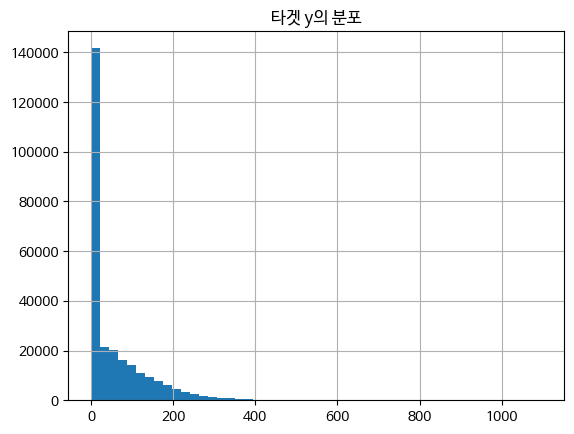

In [7]:
features["y"].hist(bins=50)
plt.title("타겟 y의 분포")
plt.show()

## 2. 기본 통계

In [9]:
features["y"].describe()

count    266500.000000
mean         57.265831
std          91.376801
min           0.000000
25%           0.000000
50%           0.000000
75%          89.000000
max        1098.000000
Name: y, dtype: float64

## 3. 카테고리/sku별 판매량

In [23]:
features.columns.tolist()

['target_date',
 'warehouse_id',
 'store_id',
 'sku_id',
 'region',
 'actual_order_qty',
 'lag_1',
 'lag_2',
 'lag_4',
 'lag_8',
 'lag_12',
 'ma_4',
 'ma_8',
 'ma_12',
 'share_norm',
 'promo_flag',
 'year',
 'weekofyear',
 'month',
 'sin_week',
 'cos_week',
 'avg_temp_c',
 'cdd',
 'hdd',
 'precip_mm',
 'heat_wave',
 'cold_wave',
 'himart_sales_krw',
 'himart_sales_index',
 'holiday_index',
 'marketing_score',
 'seasonal_peak',
 'back_to_school',
 'avg_temp_c_ma4',
 'cdd_ma4',
 'hdd_ma4',
 'precip_mm_ma4',
 'himart_sales_index_ma4',
 'holiday_index_ma4',
 'marketing_score_ma4',
 'y',
 'split']

In [22]:
import pandas as pd
BASE = "../app/data_pipeline"
sku = pd.read_csv(f"{BASE}/sku_catalog.csv")

sku = sku[['sku_id', 'cat_low']] 

features_merged = features.merge(sku, on='sku_id', how='left')
features_merged.groupby("cat_low")["y"].sum().sort_values(ascending=False).head(20)


cat_low
데스크탑     1247196.0
믹서기      1194356.0
스마트워치    1193706.0
전자레인지    1089324.0
식기세척기    1036365.0
토스터기      986660.0
커피머신      986093.0
노트북       831330.0
냉장고       830169.0
공기청정기     829390.0
에어컨       828967.0
오븐        728422.0
라우터       673316.0
프린터       571376.0
세탁기       519061.0
스마트폰      468059.0
모니터       363387.0
건조기       312677.0
TV        311730.0
청소기       259760.0
Name: y, dtype: float64

## 4. 날짜·주차별 패턴

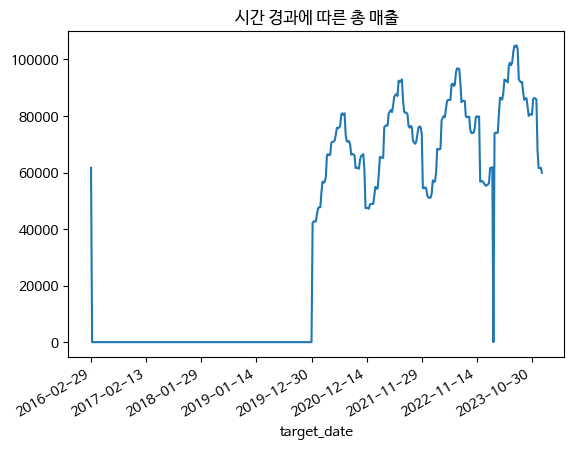

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
features.groupby("target_date")["y"].sum().plot(ax=ax)
plt.title("시간 경과에 따른 총 매출")

fig.autofmt_xdate() 
plt.show()


## 5. 외부 요인 영향

In [13]:
cols = ["avg_temp_c", "holiday_index", "promo_flag"]  
features[cols + ["y"]].corr()


,avg_temp_c,holiday_index,promo_flag,y
avg_temp_c,1.000000,0.032033,0.385128,0.462669
holiday_index,0.032033,1.000000,0.172706,0.113058
promo_flag,0.385128,0.172706,1.000000,0.683901
y,0.462669,0.113058,0.683901,1.000000
